# Analisys of VK dataframes

In [116]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

Values in csv file are stored in json format. That is done to simplify decoding objects (i.e. dates, some infos in attach column).

In [117]:
df = pd.read_csv("dataframe.csv")
df["date"] = df["date"].apply(lambda x: parse(x))

In [118]:
df.head()

,date,id,text,rep_count,likes,com_count,attach,attachs_count
0,2021-05-06 04:42:03,2006,"Москвичи, для вас. ЦОДД ОБЪЯВИЛ СБОР ПРЕДЛОЖЕН...",0,0,0,[],0
1,2021-03-14 21:46:13,2004,NaN,0,1,0,[],0
2,2021-01-06 19:50:12,1999,На Енисее как живут.,0,3,0,[{'link': 'https://youtu.be/MN-6UU-QCAo'}],1
3,2020-12-11 17:28:13,1997,Вот так работаем над композицией!,0,5,0,[],0
4,2020-12-01 23:55:36,1996,NaN,0,0,0,[],0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           800 non-null    datetime64[ns]
 1   id             800 non-null    int64         
 2   text           446 non-null    object        
 3   rep_count      800 non-null    int64         
 4   likes          800 non-null    int64         
 5   com_count      800 non-null    int64         
 6   attach         800 non-null    object        
 7   attachs_count  800 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 50.1+ KB


Then we split column date for grouping values. 

In [120]:
df["year"]=df['date'].apply(lambda x: x.year)
df["month"]=df['date'].apply(lambda x: x.month)
df["day"]=df['date'].apply(lambda x: x.day)
df["week_day"]=df['date'].apply(lambda x: x.weekday())
df["hour"]=df['date'].apply(lambda x: x.hour)

In [121]:
df.head()

,date,id,text,rep_count,likes,com_count,attach,attachs_count,year,month,day,week_day,hour
0,2021-05-06 04:42:03,2006,"Москвичи, для вас. ЦОДД ОБЪЯВИЛ СБОР ПРЕДЛОЖЕН...",0,0,0,[],0,2021,5,6,3,4
1,2021-03-14 21:46:13,2004,NaN,0,1,0,[],0,2021,3,14,6,21
2,2021-01-06 19:50:12,1999,На Енисее как живут.,0,3,0,[{'link': 'https://youtu.be/MN-6UU-QCAo'}],1,2021,1,6,2,19
3,2020-12-11 17:28:13,1997,Вот так работаем над композицией!,0,5,0,[],0,2020,12,11,4,17
4,2020-12-01 23:55:36,1996,NaN,0,0,0,[],0,2020,12,1,1,23


**Now you can create Pivot tables like**: (year/month/week day etc.)-mean(number of likes/comments/reposts etc.)-count of items

In [122]:
year_likes = pd.pivot_table(df, index=["year"], values=["likes"], aggfunc=[np.mean, len])
year_likes.columns = ['mean of likes per post', 'num of posts']
    
month_likes = pd.pivot_table(df, index=["month"], values=["likes"], aggfunc=[np.mean, len])
month_likes.columns = ['mean of likes per post', 'num of posts']

weekday_likes = pd.pivot_table(df, index=["week_day"], values=["likes"], aggfunc=[np.mean, len])
weekday_likes.columns = ['mean of likes per post', 'num of posts']

hour_likes = pd.pivot_table(df, index=["hour"], values=["likes"], aggfunc=[np.mean, len])
hour_likes.columns = ['mean of likes per post', 'num of posts']

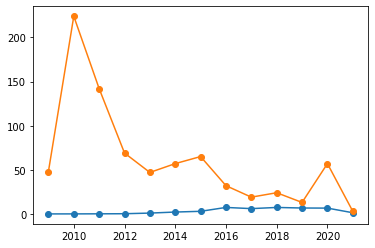

In [123]:
plt.plot(year_likes, marker = 'o')

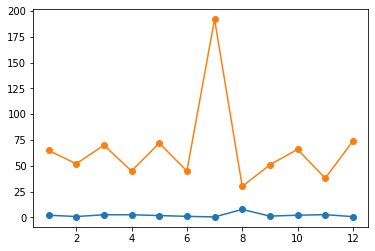

In [124]:
plt.plot(month_likes, marker = 'o')

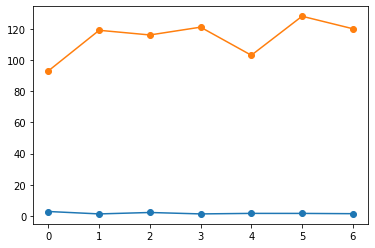

In [125]:
plt.plot(weekday_likes, marker = 'o')

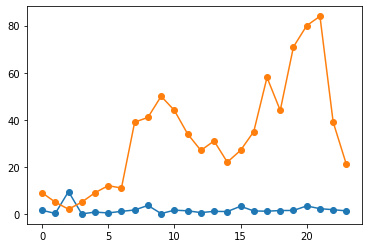

In [126]:
plt.plot(hour_likes, marker = 'o')